In [ ]:
#### MENYIAPKAN ENVIRONMENT #####
# Membersihkan semua objek dari memory
rm(list=ls()) 

# Mengatur seed untuk reproducible random numbers
set.seed(42) 

### Data Simulasi

In [ ]:
# Load library data simulasi
library(MASS) # untuk simulasi data dan fungsi stepAIC

# Menentukan jumlah observasi simulasi
N <- 100
N

[1] 100

In [ ]:
# Membuat matriks korelasi dengan pola exponential decay
# Menghasilkan matriks 10x10 dengan sifat:
# - Simetris (korelasi i,j sama dengan j,i)
# - Definit positif (syarat untuk matriks kovarian)
# - Nilai diagonal = 1 (korelasi variabel dengan dirinya sendiri)
# - Korelasi menurun secara exponential berdasarkan jarak antar variabel
Sigma <- outer(1:10, 1:10, function(x,y) 0.5^abs(x-y))
Sigma

1.000000000,0.50000000,0.2500000,0.125000,0.06250,0.03125,0.015625,0.0078125,0.00390625,0.001953125
0.500000000,1.00000000,0.5000000,0.250000,0.12500,0.06250,0.031250,0.0156250,0.00781250,0.003906250
0.250000000,0.50000000,1.0000000,0.500000,0.25000,0.12500,0.062500,0.0312500,0.01562500,0.007812500
0.125000000,0.25000000,0.5000000,1.000000,0.50000,0.25000,0.125000,0.0625000,0.03125000,0.015625000
0.062500000,0.12500000,0.2500000,0.500000,1.00000,0.50000,0.250000,0.1250000,0.06250000,0.031250000
0.031250000,0.06250000,0.1250000,0.250000,0.50000,1.00000,0.500000,0.2500000,0.12500000,0.062500000
0.015625000,0.03125000,0.0625000,0.125000,0.25000,0.50000,1.000000,0.5000000,0.25000000,0.125000000
0.007812500,0.01562500,0.0312500,0.062500,0.12500,0.25000,0.500000,1.0000000,0.50000000,0.250000000
0.003906250,0.00781250,0.0156250,0.031250,0.06250,0.12500,0.250000,0.5000000,1.00000000,0.500000000
0.001953125,0.00390625,0.0078125,0.015625,0.03125,0.06250,0.125000,0.2500000,0.50000000,1.000000000


In [31]:
# Membuat data multivariat normal
# - Menggunakan fungsi mvrnorm dari package MASS
# - Menghasilkan matriks N×10 (100 observasi, 10 variabel)
# - Mean setiap variabel = 0 (rep(0,10))
# - Struktur korelasi antar variabel mengikuti matriks Sigma
x_mvrnorm <- mvrnorm(N, rep(0,10), Sigma)
head(x_mvrnorm)

-1.8256814,-0.1174426,-0.04164722,0.35180444,1.3619220,0.7319327,0.2272463,0.92189204,0.35758636,0.03645931
0.2688495,0.6200021,0.98226915,-0.75525573,0.3608686,1.6662047,1.7220392,0.73220464,-1.05017427,-0.05005634
0.6777329,0.4105477,1.61997069,0.00105218,-0.1859264,-1.0831533,1.0122380,0.45175381,-0.23750452,0.87307661
0.8231561,0.4956478,0.58663857,-1.31688328,1.1018949,-0.2817486,-0.3561922,-0.06705255,0.08478662,0.04455286
-0.6894078,1.1172485,0.01647177,-0.20857370,0.2258124,-1.5204248,0.2913901,-0.82511718,-1.08685263,-0.68162500
-0.8049910,0.6010623,0.94666014,-0.15001445,-0.0248337,0.2073651,-1.2202014,-1.30269106,-0.80810337,0.39173406


In [32]:
# Mengubah beberapa variabel kontinyu menjadi kategorik
# Mengubah x3 menjadi biner dengan threshold 0.5
# Mengubah x4 menjadi biner dengan threshold 0
# Mengubah x5 menjadi kategorik 4 level
# Mengubah x8 menjadi biner dengan threshold -0.5
# Mengubah x9 menjadi biner dengan threshold 0.5
# Mengubah x10 menjadi kategorik 4 level
x_mvrnorm[,3] <- ifelse(x_mvrnorm[,3] > 0.5, 1, 0)
x_mvrnorm[,4] <- ifelse(x_mvrnorm[,4] > 0, 1, 0)      
x_mvrnorm[,5] <- cut(x_mvrnorm[,5], breaks=c(-Inf, -1, 0, 1, Inf), labels = FALSE)  
x_mvrnorm[,8] <- ifelse(x_mvrnorm[,8] > -0.5, 1, 0)   
x_mvrnorm[,9] <- ifelse(x_mvrnorm[,9] > 0.5, 1, 0)    
x_mvrnorm[,10] <- cut(x_mvrnorm[,10], breaks=c(-Inf, -1, 0, 1, Inf), labels = FALSE) 
head(x_mvrnorm)

-1.8256814,-0.1174426,0,1,4,0.7319327,0.2272463,1,0,3
0.2688495,0.6200021,1,0,3,1.6662047,1.7220392,1,0,2
0.6777329,0.4105477,1,1,2,-1.0831533,1.0122380,1,0,3
0.8231561,0.4956478,1,0,4,-0.2817486,-0.3561922,1,0,3
-0.6894078,1.1172485,0,0,3,-1.5204248,0.2913901,0,0,2
-0.8049910,0.6010623,1,0,2,0.2073651,-1.2202014,0,0,3


In [33]:
# Mengubah matriks x menjadi data frame dan memberi nama kolom
data.cont.complete <- data.frame(x_mvrnorm)
colnames(data.cont.complete) <- c(paste0("x", 1:5), paste0("z", 1:5))

head(data.cont.complete)

,x1,x2,x3,x4,x5,z1,z2,z3,z4,z5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.8256814,-0.1174426,0,1,4,0.7319327,0.2272463,1,0,3
2,0.2688495,0.6200021,1,0,3,1.6662047,1.7220392,1,0,2
3,0.6777329,0.4105477,1,1,2,-1.0831533,1.0122380,1,0,3
4,0.8231561,0.4956478,1,0,4,-0.2817486,-0.3561922,1,0,3
5,-0.6894078,1.1172485,0,0,3,-1.5204248,0.2913901,0,0,2
6,-0.8049910,0.6010623,1,0,2,0.2073651,-1.2202014,0,0,3


In [34]:
# Membuat variabel respon (y)
# dengan hubungan non-linear dengan masing-masing prediktornya
# Komponen dalam pembuatan y:
# - Efek linear: x1, x2
# - Efek kuadratik: x1^2, x2^2
# - Efek variabel biner: x3, x4
# - Efek kategorik x5:
#   * Level 2: +0.2
#   * Level 3: -0.1
#   * Level 4: +0.4
#   * Level 1: 0 (kategori referensi)
# - Random error: rnorm(N,0,1) untuk menambahkan noise

data.cont.complete$y <- with(
  data.cont.complete,
  x1 + 0.2*x1^2 + 0.5*x2 - 0.2*x2^2 + 0.3*x3 + 0.2*x4 + 0.2*(x5==2) - 0.1*(x5==3) + 0.4*(x5==4) + rnorm(N,0,1)
)

head(data.cont.complete)

,x1,x2,x3,x4,x5,z1,z2,z3,z4,z5,y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.8256814,-0.1174426,0,1,4,0.7319327,0.2272463,1,0,3,-1.2074773
2,0.2688495,0.6200021,1,0,3,1.6662047,1.7220392,1,0,2,1.6434017
3,0.6777329,0.4105477,1,1,2,-1.0831533,1.0122380,1,0,3,1.5757554
4,0.8231561,0.4956478,1,0,4,-0.2817486,-0.3561922,1,0,3,0.9202520
5,-0.6894078,1.1172485,0,0,3,-1.5204248,0.2913901,0,0,2,-1.0192352
6,-0.8049910,0.6010623,1,0,2,0.2073651,-1.2202014,0,0,3,-0.5223372


In [35]:
# Mengubah variabel kategorik menjadi faktor
# - Kolom 3,4,8,9: variabel biner (0/1)
# - Kolom 5,10: variabel kategorik (1-4)
# - Kesimpulan: variabel yang dirubah yaitu 3-5 dan 8-10
# Data ini cocok untuk:
# - Simulasi model regresi
# - Pengujian metode statistik
# - Studi simulasi dengan prediktor campuran (kontinyu, biner, kategorik)
data.cont.complete[,c(3:5, 8:10)] <- lapply(
    data.cont.complete[,c(3:5, 8:10)],
    factor
)
head(data.cont.complete)

,x1,x2,x3,x4,x5,z1,z2,z3,z4,z5,y
,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>
1,-1.8256814,-0.1174426,0,1,4,0.7319327,0.2272463,1,0,3,-1.2074773
2,0.2688495,0.6200021,1,0,3,1.6662047,1.7220392,1,0,2,1.6434017
3,0.6777329,0.4105477,1,1,2,-1.0831533,1.0122380,1,0,3,1.5757554
4,0.8231561,0.4956478,1,0,4,-0.2817486,-0.3561922,1,0,3,0.9202520
5,-0.6894078,1.1172485,0,0,3,-1.5204248,0.2913901,0,0,2,-1.0192352
6,-0.8049910,0.6010623,1,0,2,0.2073651,-1.2202014,0,0,3,-0.5223372


### Simulasi _Missing Data_

In [ ]:
# Step 1: Create matrix of zeros with same dimensions as our data (data.cont.complete)
missing.matrix = matrix(0, nrow=nrow(data.cont.complete), ncol=ncol(data.cont.complete))
head(missing.matrix)
length(missing.matrix) # 11 variabel x 100 observasi = 1100 data 

0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0


[1] 1100

In [46]:
# Step 2: Fill matrix with random binary (0/1) using rbinom
# rbinom(n, size=1, prob=0.1) menghasilkan bilangan random bernoulli (0 atau 1)
# p=0.1 artinya ada 10% peluang mendapatkan nilai 1 (missing)
# length(missing.matrix) adalah total sel dalam matriks
missing.matrix = matrix(rbinom(length(missing.matrix), 1, p=0.1), nrow=nrow(data.cont.complete))
head(missing.matrix)

0,0,0,0,0,1,0,0,0,0,0
0,0,0,0,0,1,0,0,0,0,0
0,0,0,0,0,1,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0


In [48]:
# Step 3: Create copy of complete data ke data.cont
data.cont = data.cont.complete
head(data.cont)

,x1,x2,x3,x4,x5,z1,z2,z3,z4,z5,y
,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>
1,-1.8256814,-0.1174426,0,1,4,0.7319327,0.2272463,1,0,3,-1.2074773
2,0.2688495,0.6200021,1,0,3,1.6662047,1.7220392,1,0,2,1.6434017
3,0.6777329,0.4105477,1,1,2,-1.0831533,1.0122380,1,0,3,1.5757554
4,0.8231561,0.4956478,1,0,4,-0.2817486,-0.3561922,1,0,3,0.9202520
5,-0.6894078,1.1172485,0,0,3,-1.5204248,0.2913901,0,0,2,-1.0192352
6,-0.8049910,0.6010623,1,0,2,0.2073651,-1.2202014,0,0,3,-0.5223372


In [ ]:
# Step 4: Set values to NA where missing.matrix = 1
# Mengubah nilai menjadi NA (missing) pada posisi dimana missing.matrix bernilai 1
# Karena dimensi matriks data.cont dan missing.matrix itu sama,
# maka sekitar 10% data akan menjadi missing secara random sesuai template missing.matrix
# (MCAR - Missing Completely At Random)
data.cont[missing.matrix==1] = NA
head(data.cont)
dim(data.cont)
dim(missing.matrix)


,x1,x2,x3,x4,x5,z1,z2,z3,z4,z5,y
,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>
1,-1.8256814,-0.1174426,0,1,4,NA,0.2272463,1,0,3,-1.2074773
2,0.2688495,0.6200021,1,0,3,NA,1.7220392,1,0,2,1.6434017
3,0.6777329,0.4105477,1,1,2,NA,1.0122380,NA,0,3,1.5757554
4,NA,0.4956478,1,0,4,-0.2817486,NA,1,0,3,0.9202520
5,-0.6894078,1.1172485,0,0,3,-1.5204248,0.2913901,0,0,2,-1.0192352
6,NA,0.6010623,1,0,2,0.2073651,-1.2202014,0,0,3,-0.5223372


[1] 100  11

[1] 100  11

In [54]:
# Step 5: Create a clustering variable
# Tujuan: Mengelompokkan data untuk internal-external validation
data.cont$clust <- factor(
  sample(                  # Mengambil sampel random
    1:5,                   # Dari angka 1-5 (5 cluster)
    size = N,              # Sebanyak N (jumlah observasi)
    replace = TRUE,        # Dengan pengembalian atau nilai yang sama dapat diambil kembali
    prob = rep(0.2,5)      # Probabilitas sama untuk tiap cluster (0.2)
  )
)
head(data.cont)

,x1,x2,x3,x4,x5,z1,z2,z3,z4,z5,y,clust
,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>
1,-1.8256814,-0.1174426,0,1,4,NA,0.2272463,1,0,3,-1.2074773,3
2,0.2688495,0.6200021,1,0,3,NA,1.7220392,1,0,2,1.6434017,1
3,0.6777329,0.4105477,1,1,2,NA,1.0122380,NA,0,3,1.5757554,2
4,NA,0.4956478,1,0,4,-0.2817486,NA,1,0,3,0.9202520,2
5,-0.6894078,1.1172485,0,0,3,-1.5204248,0.2913901,0,0,2,-1.0192352,1
6,NA,0.6010623,1,0,2,0.2073651,-1.2202014,0,0,3,-0.5223372,1


In [56]:
# Mengurutkan data berdasarkan cluster
# Tujuan: Memudahkan visualisasi dan analisis per cluster
data.cont <- data.cont[order(data.cont$clust),]
head(data.cont)

,x1,x2,x3,x4,x5,z1,z2,z3,z4,z5,y,clust
,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>
2,0.2688495,0.62000209,1,0,3,NA,1.7220392,1,0,2,1.6434017,1
5,-0.6894078,1.11724847,0,0,3,-1.52042477,0.2913901,0,0,2,-1.0192352,1
6,NA,0.60106228,1,0,2,0.20736515,-1.2202014,0,0,3,-0.5223372,1
12,0.9237489,0.89367223,0,1,1,-0.29824957,NA,0,0,3,0.7121298,1
13,NA,NA,0,0,2,-0.03254685,NA,1,0,3,0.7522273,1
18,-0.9584556,0.01146436,0,NA,2,NA,1.1174678,1,1,NA,NA,1


In [57]:
# Melihat proporsi missing di setiap kolom
colMeans(is.na(data.cont))

x1    x2    x3    x4    x5    z1    z2    z3    z4    z5     y clust 
 0.12  0.09  0.06  0.10  0.05  0.11  0.13  0.12  0.09  0.11  0.07  0.00

In [68]:
# Melihat posisi NA dalam data
head(which(is.na(data.cont), arr.ind=TRUE))

,row,col
6,3,1
13,5,1
77,17,1
4,23,1
64,34,1
47,48,1


In [59]:
# Membandingkan data asli vs data dengan missing
head(data.cont.complete) # data asli
head(data.cont)         # data dengan NA

,x1,x2,x3,x4,x5,z1,z2,z3,z4,z5,y
,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>
1,-1.8256814,-0.1174426,0,1,4,0.7319327,0.2272463,1,0,3,-1.2074773
2,0.2688495,0.6200021,1,0,3,1.6662047,1.7220392,1,0,2,1.6434017
3,0.6777329,0.4105477,1,1,2,-1.0831533,1.0122380,1,0,3,1.5757554
4,0.8231561,0.4956478,1,0,4,-0.2817486,-0.3561922,1,0,3,0.9202520
5,-0.6894078,1.1172485,0,0,3,-1.5204248,0.2913901,0,0,2,-1.0192352
6,-0.8049910,0.6010623,1,0,2,0.2073651,-1.2202014,0,0,3,-0.5223372


,x1,x2,x3,x4,x5,z1,z2,z3,z4,z5,y,clust
,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>
2,0.2688495,0.62000209,1,0,3,NA,1.7220392,1,0,2,1.6434017,1
5,-0.6894078,1.11724847,0,0,3,-1.52042477,0.2913901,0,0,2,-1.0192352,1
6,NA,0.60106228,1,0,2,0.20736515,-1.2202014,0,0,3,-0.5223372,1
12,0.9237489,0.89367223,0,1,1,-0.29824957,NA,0,0,3,0.7121298,1
13,NA,NA,0,0,2,-0.03254685,NA,1,0,3,0.7522273,1
18,-0.9584556,0.01146436,0,NA,2,NA,1.1174678,1,1,NA,NA,1


### Koreksi _Missing Data_

#### Visualisasi _Missing Data_

In [ ]:
###### MULTIPLE IMPUTATION UNTUK MISSING DATA ####
# Tujuan: Mengisi missing data dengan mempertimbangkan hubungan antar variabel
# Metode: Multiple imputation dengan aregImpute dari package Hmisc
# Output: 10 dataset lengkap dengan nilai imputasi yang berbeda-beda

In [104]:
# Periksa jumlah missing data
sum(complete.cases(data.cont[,1:5])) # jumlah pasien dengan data observasi lengkap untuk prediktor x1,2,3,4,5 (5 kolom pertama)
sum(complete.cases(data.cont$y)) # jumlah pasien dengan data observasi lengkap untuk outcome y

[1] 65

[1] 93

,clust,x5,x3,y,x2,z4,x4,z1,z5,x1,z3,z2,
36,1,1,1,1,1,1,1,1,1,1,1,1,0
4,1,1,1,1,1,1,1,1,1,1,1,0,1
2,1,1,1,1,1,1,1,1,1,1,0,1,1
3,1,1,1,1,1,1,1,1,1,1,0,0,2
4,1,1,1,1,1,1,1,1,1,0,1,1,1
1,1,1,1,1,1,1,1,1,1,0,1,0,2
2,1,1,1,1,1,1,1,1,0,1,1,1,1
2,1,1,1,1,1,1,1,1,0,1,1,0,2
4,1,1,1,1,1,1,1,0,1,1,1,1,1
1,1,1,1,1,1,1,1,0,1,1,0,1,2


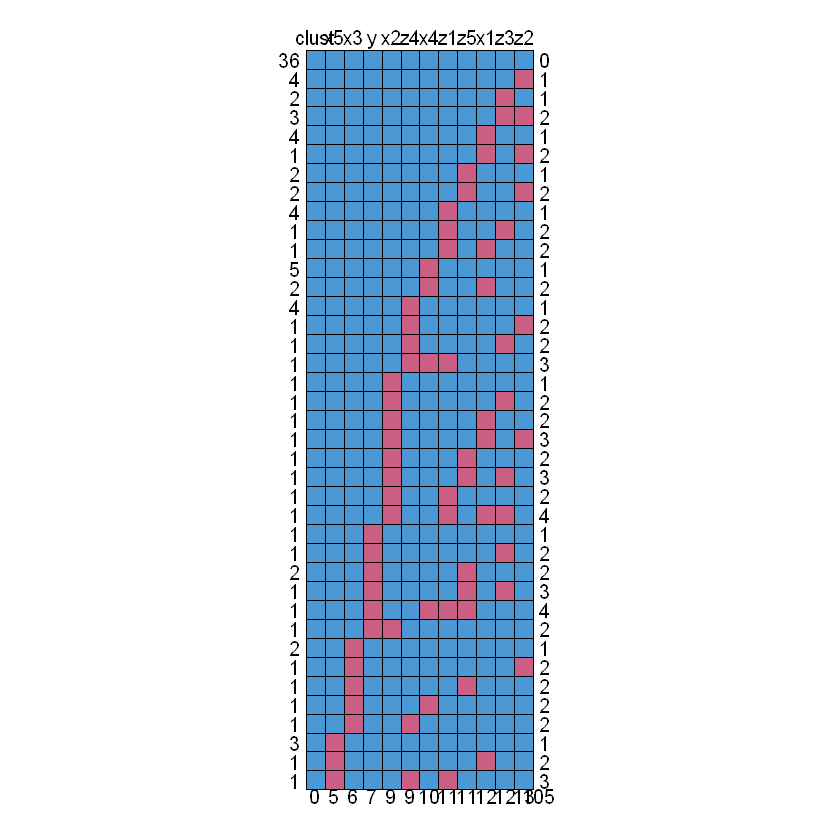

In [119]:
# Visualisasikan missing data dengan mice dan VIM
# (Visualization of Missing and Imputed Values)
library(mice)
md.pattern(data.cont, plot = TRUE)

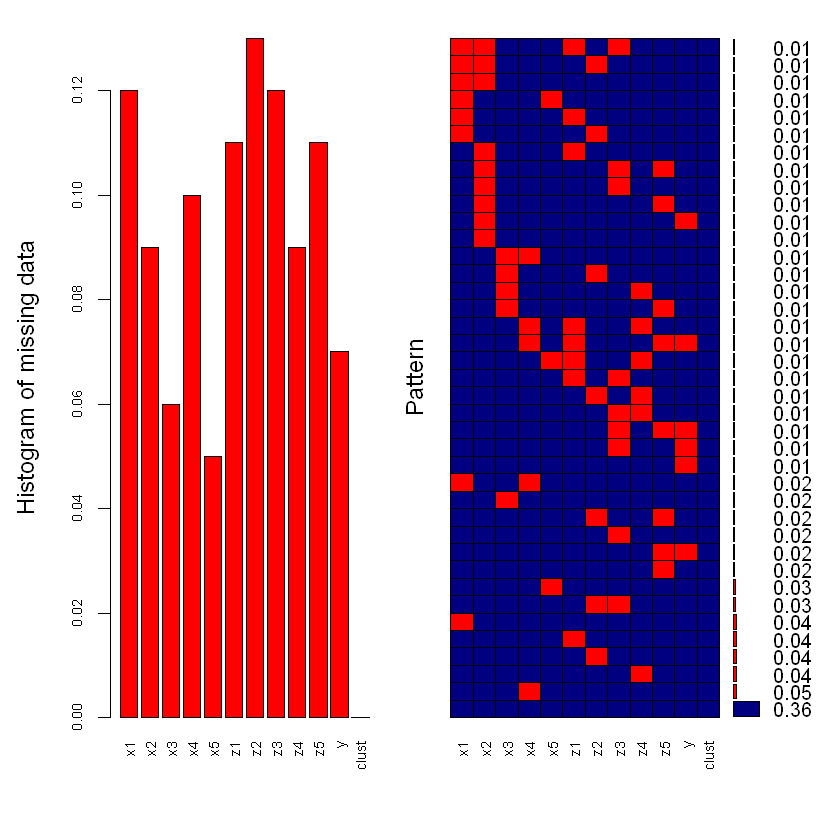

In [120]:
library(VIM)
aggr_plot <- aggr(
  data.cont,
  col=c('navyblue','red'),
  numbers=TRUE,
  sortVars=FALSE,
  labels=names(data.cont),
  cex.axis=.7,
  gap=3,
  ylab=c("Histogram of missing data","Pattern")
)

#### _Multiple Imputation_

In [122]:
# Load package yang dibutuhkan
library(Hmisc)

In [123]:
# Proporsi missing di data asli
colSums(is.na(data.cont))/nrow(data.cont) 

x1    x2    x3    x4    x5    z1    z2    z3    z4    z5     y clust 
 0.12  0.09  0.06  0.10  0.05  0.11  0.13  0.12  0.09  0.11  0.07  0.00

In [124]:
# Menentukan jumlah imputasi
# - Minimal direkomendasikan 5-10 imputasi
# - Semakin besar n.impute, semakin stabil estimasi tapi komputasi lebih lama
# - Rule of thumb: n.impute minimal sama dengan persentase missing data
n.impute <- 10

In [127]:
# Melakukan multiple imputation menggunakan aregImpute
a <- aregImpute(
  # Formula model:
  # - y sebagai outcome
  # - x1,x2: variabel kontinyu dengan splines (hubungan non-linear)
  # - x3,x4,x5: variabel kategorik untuk predictor pertama (dibungkus dengan I())
  # - z1,z2: variabel kontinyu tanpa splines
  # - z3,z4,z5: variabel kategorik untuk predictor kedua (dibungkus dengan I())
  formula = I(y)~x1+x2+I(x3)+I(x4)+I(x5)+z1+z2+I(z3)+I(z4)+I(z5),
  data = data.cont,    # dataset dengan missing values
  n.impute = n.impute, # jumlah dataset imputasi yang diinginkan
  nk = 3,              # jumlah knots untuk splines (x1 dan x2)
  match = 'closest'    # metode predictive mean matching
)
a

Iteration 13 



Multiple Imputation using Bootstrap and PMM

aregImpute(formula = I(y) ~ x1 + x2 + I(x3) + I(x4) + I(x5) + 
    z1 + z2 + I(z3) + I(z4) + I(z5), data = data.cont, n.impute = n.impute, 
    nk = 3, match = "closest")

n: 100 	p: 11 	Imputations: 10  	nk: 3 

Number of NAs:
 y x1 x2 x3 x4 x5 z1 z2 z3 z4 z5 
 7 12  9  6 10  5 11 13 12  9 11 

   type d.f.
y     l    1
x1    s    2
x2    s    2
x3    c    1
x4    c    1
x5    c    3
z1    s    2
z2    s    2
z3    c    1
z4    c    1
z5    c    3

Transformation of Target Variables Forced to be Linear

R-squares for Predicting Non-Missing Values for Each Variable
Using Last Imputations of Predictors
    y    x1    x2    x3    x4    x5    z1    z2    z3    z4    z5 
0.836 0.699 0.626 0.491 0.409 0.639 0.440 0.550 0.439 0.307 0.409 

In [148]:
# Menyimpan hasil imputasi dalam list
# Setiap elemen list berisi satu dataset lengkap hasil imputasi
imputed_list <- list()

In [149]:
# Loop untuk mendapatkan setiap dataset hasil imputasi
for (i in 1:n.impute){
  # impute.transcan: mengaplikasikan hasil aregImpute ke data
  # - Mengambil hasil transformasi dari aregImpute
  # - Mengaplikasikan ke missing values
  # - Menghasilkan dataset lengkap
  imputed_list[[i]] <- impute.transcan(
    a,                # hasil dari aregImpute
    imputation = i,   # mengambil hasil imputasi ke-i
    data = data.cont, # data original dengan missing
    list.out = TRUE,  # output dalam bentuk list
    pr = TRUE,       # tidak print progress
    check = FALSE     # tidak cek konsistensi
  )
}



Imputed missing values with the following frequencies
 and stored them in variables with their original names:

 y x1 x2 x3 x4 x5 z1 z2 z3 z4 z5 
 7 12  9  6 10  5 11 13 12  9 11 


Imputed missing values with the following frequencies
 and stored them in variables with their original names:

 y x1 x2 x3 x4 x5 z1 z2 z3 z4 z5 
 7 12  9  6 10  5 11 13 12  9 11 


Imputed missing values with the following frequencies
 and stored them in variables with their original names:

 y x1 x2 x3 x4 x5 z1 z2 z3 z4 z5 
 7 12  9  6 10  5 11 13 12  9 11 


Imputed missing values with the following frequencies
 and stored them in variables with their original names:

 y x1 x2 x3 x4 x5 z1 z2 z3 z4 z5 
 7 12  9  6 10  5 11 13 12  9 11 


Imputed missing values with the following frequencies
 and stored them in variables with their original names:

 y x1 x2 x3 x4 x5 z1 z2 z3 z4 z5 
 7 12  9  6 10  5 11 13 12  9 11 


Imputed missing values with the following frequencies
 and stored them in variables with

In [150]:
# PENTING: Penanganan missing pada outcome (y)
# JIKA tidak menggunakan auxiliary variables:
missing.y <- which(is.na(data.cont$y))
for (i in 1:n.impute){
  imputed_list[[i]] <- as.data.frame(imputed_list[[i]])
  imputed_list[[i]] <- imputed_list[[i]][-missing.y,]
}

# JIKA menggunakan auxiliary variables:
# Biarkan kode selesai sampai di atas loop kedua

In [151]:
# Melihat hasil imputasi pertama
head(imputed_list[[1]])

,y,x1,x2,x3,x4,x5,z1,z2,z3,z4,z5
,<dbl>,<impute>,<impute>,<fct>,<fct>,<fct>,<impute>,<impute>,<fct>,<fct>,<fct>
1,1.6434017,0.2688495,0.6200021,1,0,3,3.25509611,1.7220392,1,0,2
2,-1.0192352,-0.6894078,1.1172485,0,0,3,-1.52042477,0.2913901,0,0,2
3,-0.5223372,-0.4706753,0.6010623,1,0,2,0.20736515,-1.2202014,0,0,3
4,0.7121298,0.9237489,0.8936722,0,1,1,-0.29824957,-1.6426383,0,0,3
5,0.7522273,-0.1179529,-0.4783984,0,0,2,-0.03254685,-1.2202014,1,0,3
7,2.1240517,1.3979796,1.1087925,0,1,2,-1.45559556,-0.9655180,1,0,2


In [152]:
# Melihat hasil imputasi dan membandingkan data dengan missing values (data.cont)
# Proporsi missing di data asli
colSums(is.na(data.cont))/nrow(data.cont)  

x1    x2    x3    x4    x5    z1    z2    z3    z4    z5     y clust 
 0.12  0.09  0.06  0.10  0.05  0.11  0.13  0.12  0.09  0.11  0.07  0.00

In [ ]:
# Mengkonversi hasil imputasi ke format data frame untuk pengecekan
imputed_df1 <- as.data.frame(imputed_list[[1]])
colSums(is.na(imputed_df1))/nrow(imputed_df1)  # seharusnya semua 0 karena sudah diimputasi

y x1 x2 x3 x4 x5 z1 z2 z3 z4 z5 
 0  0  0  0  0  0  0  0  0  0  0

In [139]:
# Alternatif: melihat struktur data hasil imputasi
# str(imputed1[[1]])

In [157]:
# Melihat beberapa baris pertama hasil imputasi
head(as.data.frame(imputed_list[[1]]))

,y,x1,x2,x3,x4,x5,z1,z2,z3,z4,z5
,<dbl>,<impute>,<impute>,<fct>,<fct>,<fct>,<impute>,<impute>,<fct>,<fct>,<fct>
1,1.6434017,0.2688495,0.6200021,1,0,3,3.25509611,1.7220392,1,0,2
2,-1.0192352,-0.6894078,1.1172485,0,0,3,-1.52042477,0.2913901,0,0,2
3,-0.5223372,-0.4706753,0.6010623,1,0,2,0.20736515,-1.2202014,0,0,3
4,0.7121298,0.9237489,0.8936722,0,1,1,-0.29824957,-1.6426383,0,0,3
5,0.7522273,-0.1179529,-0.4783984,0,0,2,-0.03254685,-1.2202014,1,0,3
7,2.1240517,1.3979796,1.1087925,0,1,2,-1.45559556,-0.9655180,1,0,2


### _Create Model_

#### Model OLS

##### Membuat Model OLS

In [159]:
# Load library yang dibutuhkan
library(rms)    # untuk fungsi ols dan rcs

In [164]:
# Membuat list untuk menyimpan model regresi
regression.splines <- list()

# Fit model untuk setiap dataset hasil imputation
for (i in 1:n.impute){
  # Ordinary Least Squares dengan restricted cubic splines
  regression.splines[[i]] <- ols(
    # Formula model:
    # - y: outcome
    # - rcs(x1,3): restricted cubic splines untuk x1 dengan 3 knots
    # - rcs(x2,3): restricted cubic splines untuk x2 dengan 3 knots
    # - x3,x4,x5: predictor kategorik
    formula = y ~ rcs(x1,3) + rcs(x2,3) + x3 + x4 + x5,
    data = imputed_list[[i]]
  )
}

In [177]:
regression.splines

[[1]]
Linear Regression Model

ols(formula = y ~ rcs(x1, 3) + rcs(x2, 3) + x3 + x4 + x5, data = imputed_list[[i]])

                Model Likelihood    Discrimination    
                      Ratio Test           Indexes    
Obs      93    LR chi2     99.30    R2       0.656    
sigma1.0384    d.f.            9    R2 adj   0.619    
d.f.     83    Pr(> chi2) 0.0000    g        1.542    

Residuals

    Min      1Q  Median      3Q     Max 
-2.3148 -0.6202  0.1029  0.5903  2.4009 


          Coef    S.E.   t     Pr(>|t|)
Intercept -0.2346 0.5167 -0.45 0.6509  
x1        -0.0298 0.3452 -0.09 0.9314  
x1'        1.1367 0.4323  2.63 0.0102  
x2         1.2215 0.3071  3.98 0.0001  
x2'       -0.5519 0.3893 -1.42 0.1600  
x3=1       0.3481 0.2554  1.36 0.1766  
x4=1      -0.3865 0.2421 -1.60 0.1142  
x5=2       0.2146 0.3760  0.57 0.5698  
x5=3      -0.0200 0.3800 -0.05 0.9581  
x5=4       0.4582 0.4834  0.95 0.3460  


[[2]]
Linear Regression Model

ols(formula = y ~ rcs(x1, 3) + rcs(x2, 3

In [186]:
length(regression.splines)

[1] 10

##### Visualisasi Splines (x1, x2) Model OLS

In [163]:
# Tujuan: Memvisualisasikan hubungan non-linear antara prediktor kontinyu (x1, x2) 
# dengan outcome (y) yang dimodelkan menggunakan restricted cubic splines

# Load package untuk menyusun multiple plot
library(gridExtra)  

In [168]:
###### PLOT UNTUK VARIABEL X1 -------------------------
p.sp1 <- ggplot(
  # Membuat data frame untuk plotting x1
  data.frame(
    # Membuat sequence nilai x1 dari -3 sampai 3 dengan interval 0.1
    x1 = seq(-3,3, 0.1),  
    
    # Prediksi y menggunakan model OLS dengan splines
    # - Variasi nilai x1 sesuai sequence
    # - Nilai prediktor lain dibuat tetap:
    #   * x2 = 0 (nilai tengah)
    #   * x3 = 1 (kategori referensi)
    #   * x4 = 1 (kategori referensi) 
    #   * x5 = 2 (kategori referensi)
    y = Predict(
      regression.splines[[i]], 
      x1 = seq(-3,3, 0.1),
      x2 = 0, 
      x3 = 1, 
      x4 = 1, 
      x5 = 2
    )$yhat
  ),
  # Mapping estetika plot
  aes(x=x1, y=y)
) + geom_smooth()  # Tambahkan garis smooth dengan confidence interval

In [173]:
###### PLOT UNTUK VARIABEL X2 -------------------------
p.sp2 <- ggplot(
  # Membuat data frame untuk plotting x2
  data.frame(
    # Membuat sequence nilai x2 dari -3 sampai 3 dengan interval 0.1 
    x2 = seq(-3,3, 0.1),
    
    # Prediksi y menggunakan model OLS dengan splines
    # - Variasi nilai x2 sesuai sequence
    # - Nilai prediktor lain dibuat tetap:
    #   * x1 = 1 (nilai tengah)
    #   * x3 = 1 (kategori referensi)
    #   * x4 = 1 (kategori referensi)
    #   * x5 = 2 (kategori referensi)
    y = Predict(
      regression.splines[[i]], 
      x1 = 1,
      x2 = seq(-3,3, 0.1),
      x3 = 1,
      x4 = 1,
      x5 = 2
    )$yhat
  ),
  # Mapping estetika plot  
  aes(x=x2, y=y)
) + geom_smooth()  # Tambahkan garis smooth dengan confidence interval

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


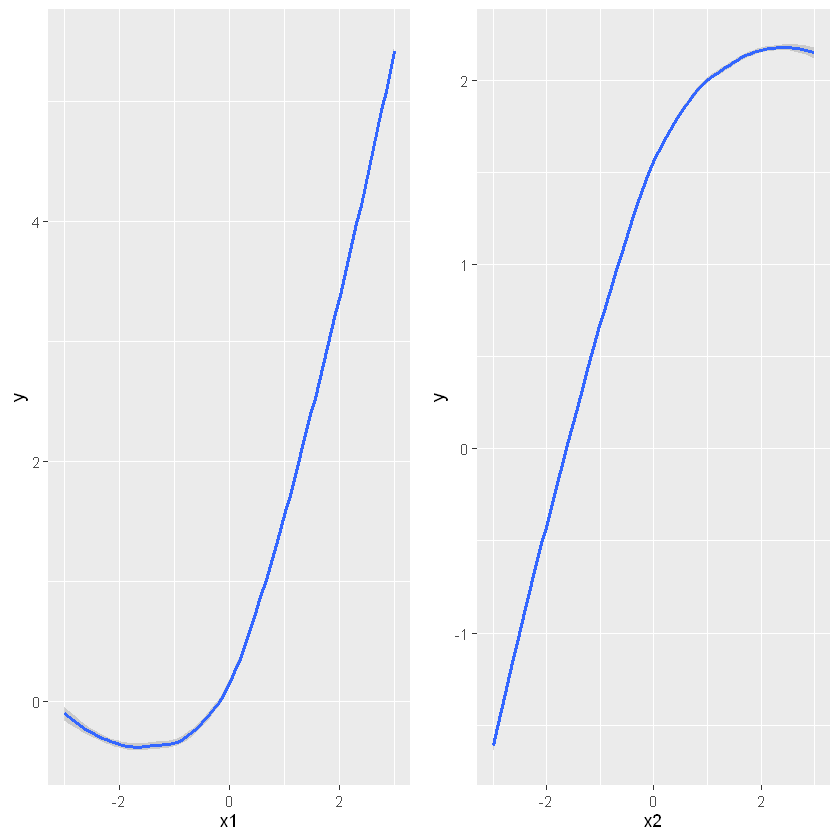

In [174]:
######  TAMPILKAN PLOT -------------------------
# Arrange kedua plot secara berdampingan dengan 2 kolom
grid.arrange(p.sp1, p.sp2, ncol=2)

# Output yang dihasilkan:
# - Dua plot yang menunjukkan hubungan non-linear antara x1 dan x2 dengan y
# - Sumbu x: nilai prediktor (x1 atau x2)
# - Sumbu y: nilai prediksi outcome (y)
# - Garis biru: estimasi hubungan non-linear dari splines
# - Area abu-abu: confidence interval dari estimasi

### Exploratory Data Analysis (EDA)

In [140]:
# Load library
library(ggplot2)
library(tidyverse)  # For data manipulation and visualization
library(car)        # For VIF calculation
library(glmnet)     # For regularization methods
library(caret)      # For modeling and cross-validation
library(corrplot)   # For correlation plots

In [141]:
summary(data.cont)
head(data.cont)

       x1                 x2              x3        x4        x5    
 Min.   :-1.90473   Min.   :-2.22799   0   :65   0   :46   1   :13  
 1st Qu.:-0.65695   1st Qu.:-0.65653   1   :29   1   :44   2   :31  
 Median :-0.08144   Median : 0.02646   NA's: 6   NA's:10   3   :42  
 Mean   :-0.03625   Mean   :-0.01692                       4   : 9  
 3rd Qu.: 0.49757   3rd Qu.: 0.58318                       NA's: 5  
 Max.   : 2.16585   Max.   : 1.92748                                
 NA's   :12         NA's   :9                                       
       z1                z2             z3        z4        z5    
 Min.   :-2.3542   Min.   :-2.1768   0   :36   0   :72   1   :18  
 1st Qu.:-0.5142   1st Qu.:-0.6992   1   :52   1   :19   2   :25  
 Median : 0.1431   Median : 0.2447   NA's:12   NA's: 9   3   :30  
 Mean   : 0.1298   Mean   : 0.1295                       4   :16  
 3rd Qu.: 0.7445   3rd Qu.: 0.9109                       NA's:11  
 Max.   : 3.2551   Max.   : 2.5723            

,x1,x2,x3,x4,x5,z1,z2,z3,z4,z5,y,clust
,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>
2,0.2688495,0.62000209,1,0,3,NA,1.7220392,1,0,2,1.6434017,1
5,-0.6894078,1.11724847,0,0,3,-1.52042477,0.2913901,0,0,2,-1.0192352,1
6,NA,0.60106228,1,0,2,0.20736515,-1.2202014,0,0,3,-0.5223372,1
12,0.9237489,0.89367223,0,1,1,-0.29824957,NA,0,0,3,0.7121298,1
13,NA,NA,0,0,2,-0.03254685,NA,1,0,3,0.7522273,1
18,-0.9584556,0.01146436,0,NA,2,NA,1.1174678,1,1,NA,NA,1


In [144]:
summary(imputed1[[1]]$y)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-3.5302 -1.1194  0.2140  0.1117  1.2819  4.5105 

##### Analisis Univariat

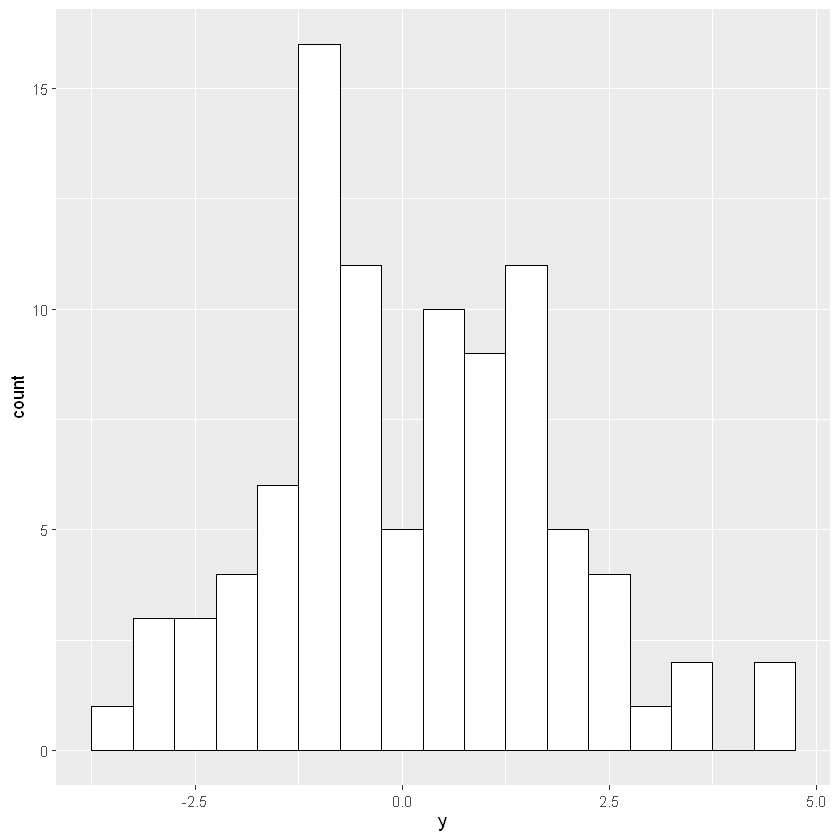

In [147]:
# Create histogram of outcome variable y
# Membuat histogram untuk melihat distribusi variabel y
# binwidth = 0.5 menentukan lebar tiap bar dalam histogram
ggplot(imputed1[[1]], aes(x=y)) + geom_histogram(color="black", fill="white", binwidth = 0.5)

Warning message:
"Removed 52 rows containing non-finite outside the scale range (`stat_bin()`)."


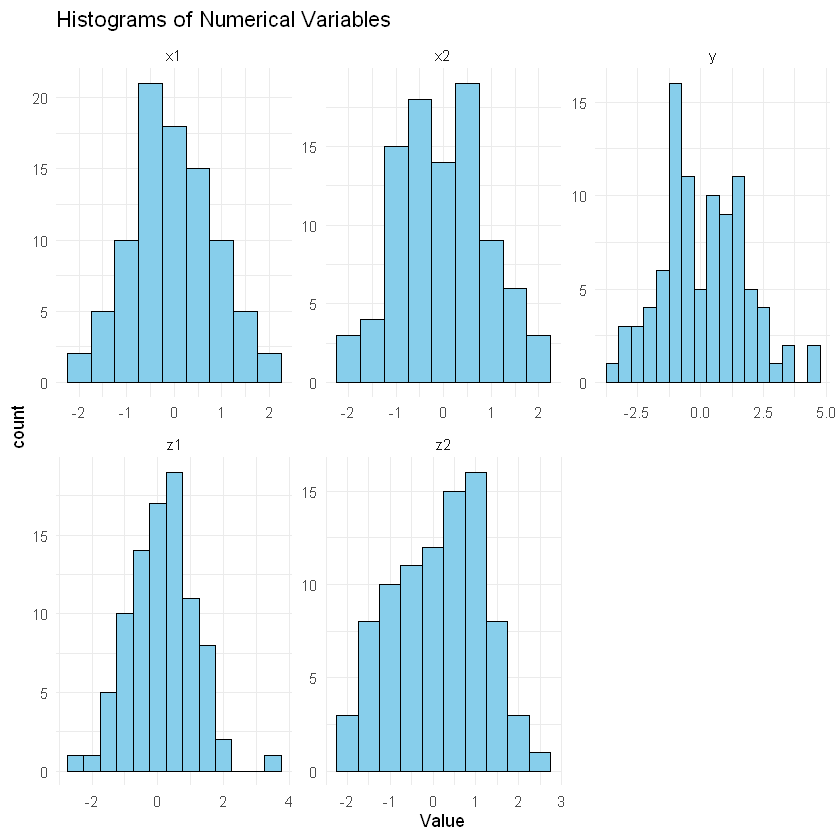

In [110]:
# Histograms for numerical variables
data.cont %>%
  select(x1, x2, z1, z2, y) %>%
  pivot_longer(cols = everything(), names_to = "Variable", values_to = "Value") %>%
  ggplot(aes(x = Value)) +
  facet_wrap(~ Variable, scales = "free", ncol = 3) +
  geom_histogram(binwidth = 0.5, fill = "skyblue", color = "black") +
  theme_minimal() +
  labs(title = "Histograms of Numerical Variables")


Warning message:
"Removed 52 rows containing non-finite outside the scale range
(`stat_boxplot()`)."


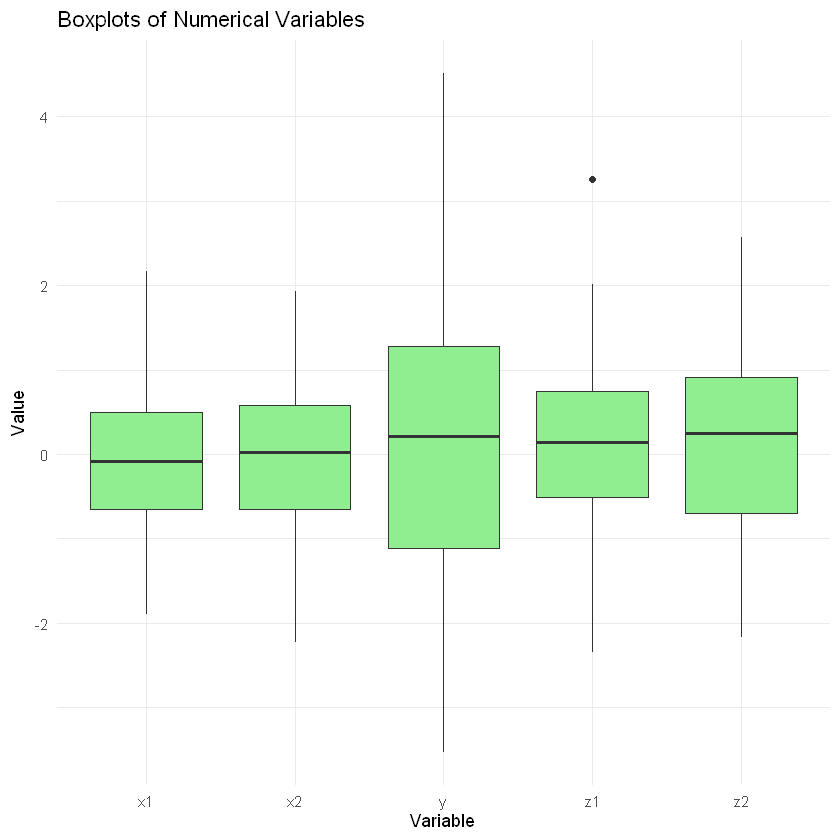

In [111]:
# Boxplots for numerical variables
data.cont %>%
  select(x1, x2, z1, z2, y) %>%
  pivot_longer(cols = everything(), names_to = "Variable", values_to = "Value") %>%
  ggplot(aes(x = Variable, y = Value)) +
  geom_boxplot(fill = "lightgreen") +
  theme_minimal() +
  labs(title = "Boxplots of Numerical Variables")


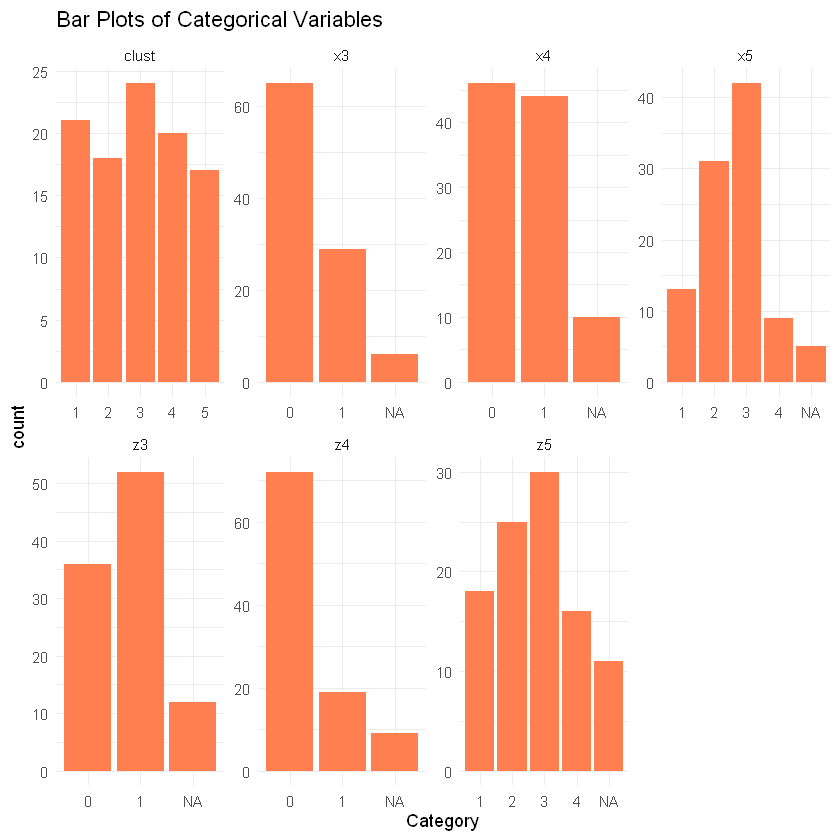

In [112]:
# Bar plots for categorical variables
data.cont %>%
  select(x3, x4, x5, z3, z4, z5, clust) %>%
  pivot_longer(cols = everything(), names_to = "Variable", values_to = "Category") %>%
  ggplot(aes(x = Category)) +
  facet_wrap(~ Variable, scales = "free", ncol = 4) +
  geom_bar(fill = "coral") +
  theme_minimal() +
  labs(title = "Bar Plots of Categorical Variables")


##### Analisis Bivariat

In [113]:
# Select numerical variables
numeric_vars <- data.cont %>%
  select(x1, x2, z1, z2, y)

head(numeric_vars)

,x1,x2,z1,z2,y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,0.2688495,0.62000209,NA,1.7220392,1.6434017
5,-0.6894078,1.11724847,-1.52042477,0.2913901,-1.0192352
6,NA,0.60106228,0.20736515,-1.2202014,-0.5223372
12,0.9237489,0.89367223,-0.29824957,NA,0.7121298
13,NA,NA,-0.03254685,NA,0.7522273
18,-0.9584556,0.01146436,NA,1.1174678,NA


In [114]:
# Compute correlation matrix
cor_matrix <- cor(numeric_vars) # default adalah Pearson's correlaton

# Display correlation matrix
print(cor_matrix)

   x1 x2 z1 z2  y
x1  1 NA NA NA NA
x2 NA  1 NA NA NA
z1 NA NA  1 NA NA
z2 NA NA NA  1 NA
y  NA NA NA NA  1


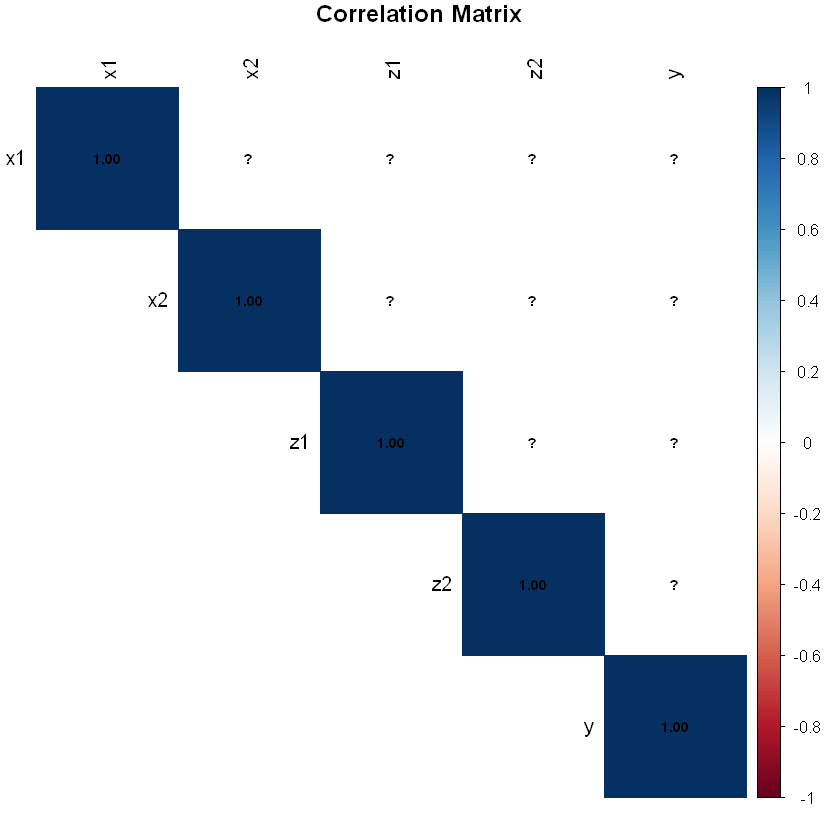

In [115]:

# Visualize correlation matrix
corrplot(cor_matrix, method = "color", addCoef.col = "black",
         tl.col = "black", number.cex = 0.7, type = "upper",
         title = "Correlation Matrix", mar = c(0,0,1,0))
